In [3]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as plt
%matplotlib inline
import torchvision.utils as vutils
import glob

In [4]:
import sys
sys.path.append('../')
import models
import models.mnist
from data import get_loaders
from utils import DictWrapper

In [5]:
%load_ext autoreload
%autoreload 1

In [8]:
%aimport log_plotter
from log_plotter import get_run_names, get_data, get_data_pth, plot_smooth, plot_tag, plot_runs_and_tags, get_legend, plot_smooth_o1

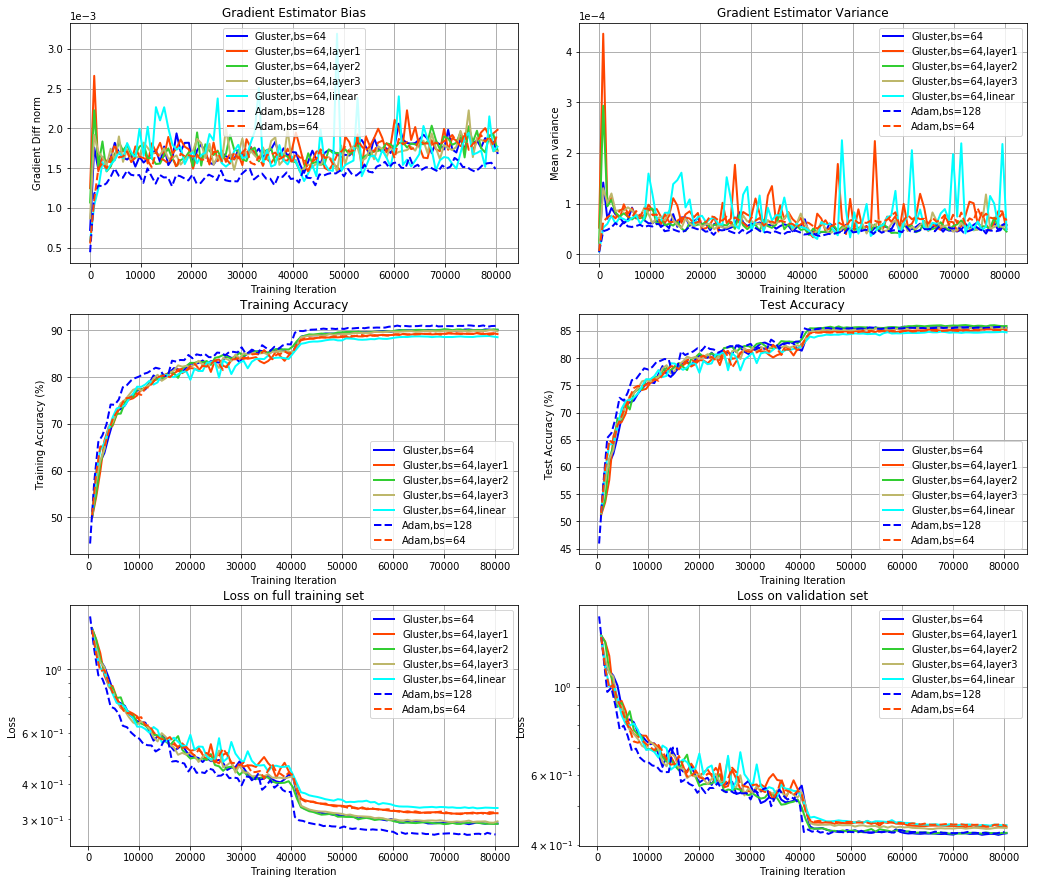

In [33]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_adam_active/.*adam']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'Tacc', 'Vacc', 'Tloss', 'Vloss']  # 'lr', 'gb_td', 
fig_name = 'figs_gvar/cifar10_adam_active.png'
lg_tags = ['optim_adam,', 'optim_sgd,', 'gluster', 'batch_size', 'active_only_']
ylim = [None]*20
# ylim = [[.2e-4, 1e-4], [0, 1.5e-7], [-1, 0.1], None, [98, 100], [98, 100], None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
lg_replace = [('g_nclusters_', 'C='), ('adam_betas_', 'betas='), ('adam_eps_', 'eps='), ('optim_sgd', 'SGD'), ('optim_adam', 'Adam'), ('adamw', 'AdamW'), ('adam', 'Adam'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('g_avg_', 'WA='), ('lr_', 'LR='), ('LR=0.001', 'LR=1e-3'), ('LR=0.0001', 'LR=1e-4'), ('LR=0.0005', 'LR=5e-4'), ('LR=0.0002', 'LR=2e-4'), ('batch_size_', 'bs='), ('Adam,SVRG', 'SVRG'), ('Adam,Gluster', 'Gluster'), ('optim_start_', 'Start='), ('bsnap_iter_', 'Snap='), ('bsnap_num_', 'Num='), ('active_only_', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace)